In [1]:
import matplotlib.pyplot as plt
import pandas as pd

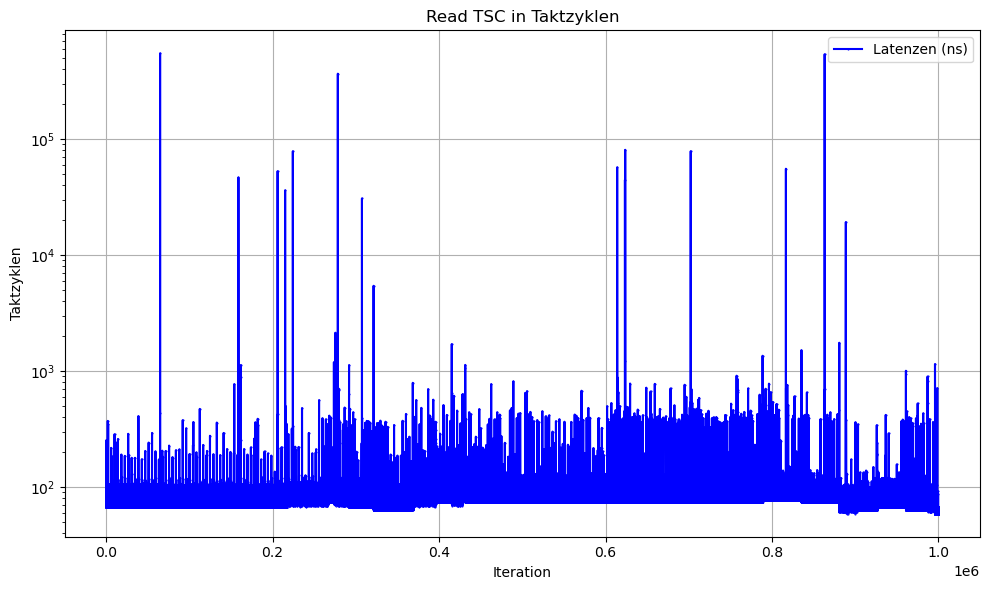

In [6]:
latencies = []

data = pd.read_csv('latencies_tsc.csv')

plt.figure(figsize=(10, 6))

plt.plot(data['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read TSC in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

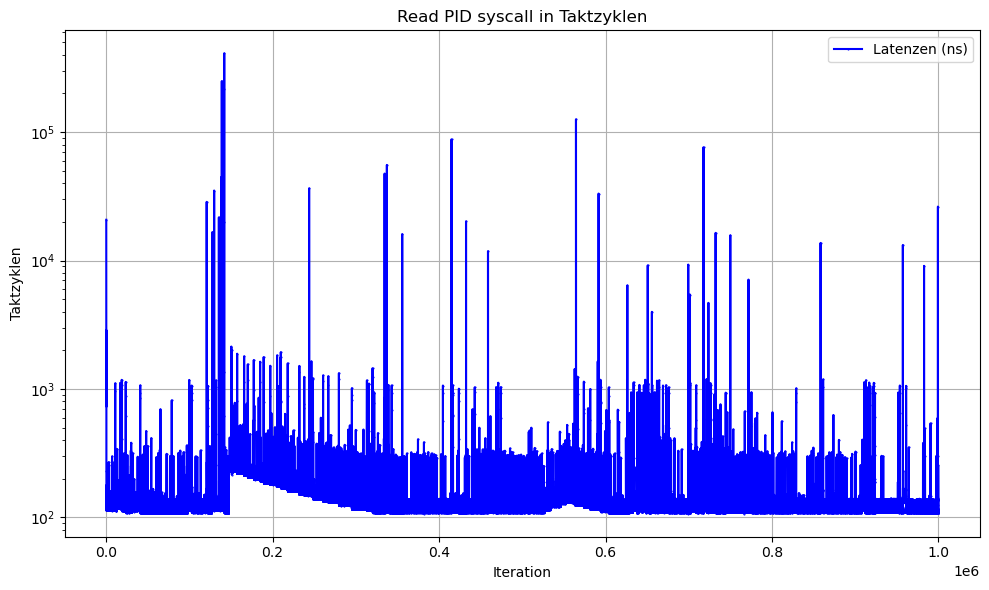

In [7]:
latencies = []

data = pd.read_csv('latencies_pid.csv')

plt.figure(figsize=(10, 6))

plt.plot(data['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read PID syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

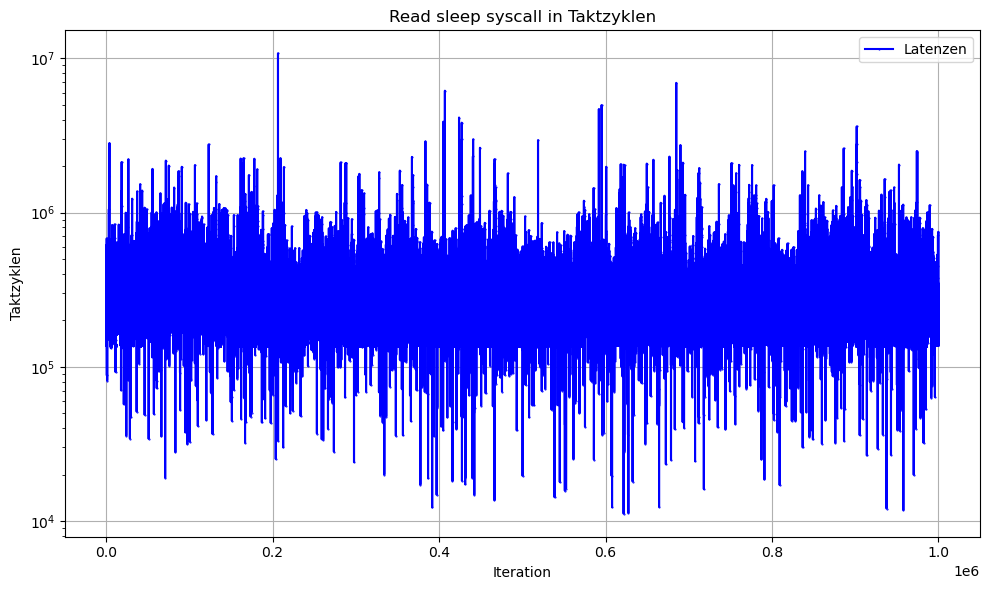

In [14]:
latencies = []

data = pd.read_csv('latencies_sleep.csv')

plt.figure(figsize=(10, 6))

plt.plot(data['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read sleep syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

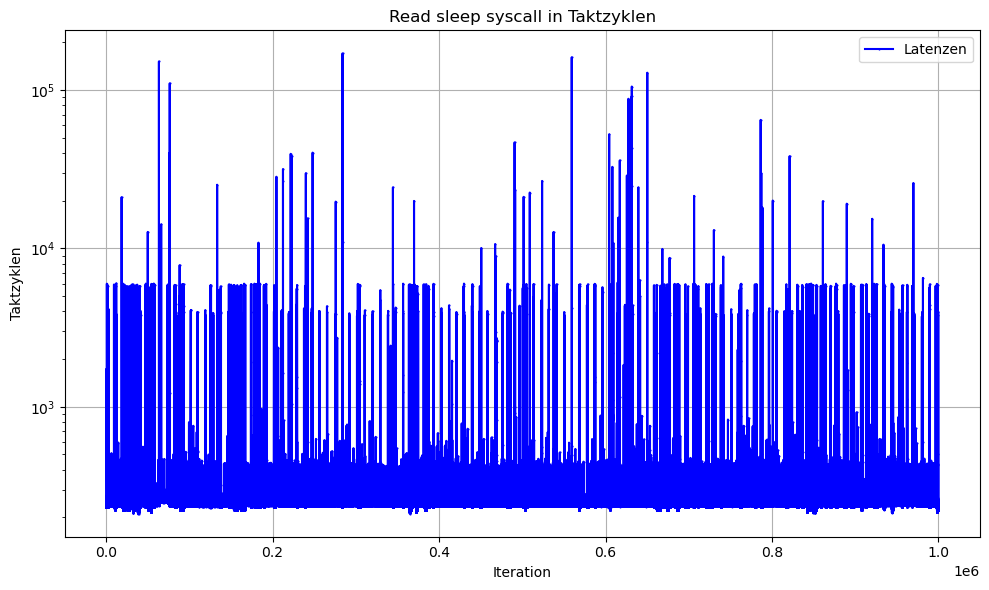

In [19]:
latencies = []

data = pd.read_csv('latencies_shed_yield.csv')

plt.figure(figsize=(10, 6))

plt.plot(data['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read sleep syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
mean_syscall = pd.Series(latencies).mean()
mean_syscall

25.836756

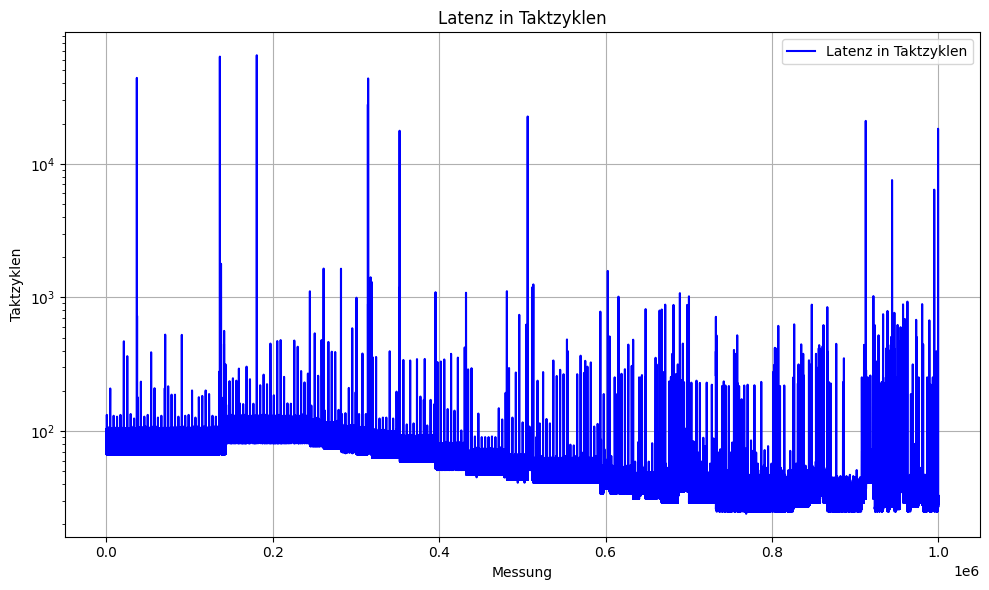

In [3]:
file_name = "latencies_tx.txt"
data = pd.read_csv(file_name)

measurements = data['Messung']
latency_ticks = data['Latenz_tz'] 

plt.figure(figsize=(10, 6))

plt.plot(measurements, latency_ticks, label="Latenz in Taktzyklen", color="blue")
plt.xlabel("Messung")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.title("Latenz in Taktzyklen")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
mean = data['Latenz_tz'].mean()
mean

53.608293

In [5]:
without_peak = data[data['Latenz_tz'] < 1000]
avg_tz = without_peak['Latenz_tz'].mean()


In [6]:
with_peak = data[data['Latenz_tz'] > 1000]
avg_tz_cc = with_peak['Latenz_tz'].mean()

In [7]:
def tz_in_ns(tz, ps):
    return tz / ps

In [8]:
print(f'Durchschnittliche Zeit Abruf RDTSC: {tz_in_ns(avg_tz, 3.0):.2f} ns')

Durchschnittliche Zeit Abruf RDTSC: 17.75 ns


In [9]:
print(f'Durchschnittliche Zeit eines Kontextwechsels: {tz_in_ns(avg_tz_cc, 3.0):.2f} ns')

Durchschnittliche Zeit eines Kontextwechsels: 4004.14 ns


In [10]:
print(f'Durchschnittliche Zeit eines Syscalls ohne Ausführung der Abfrage: {mean_syscall - tz_in_ns(avg_tz, 3.0):.2f} ns')

Durchschnittliche Zeit eines Syscalls ohne Ausführung der Abfrage: 8.09 ns
